In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
from matplotlib import pyplot as plt

In [10]:
df = pd.read_csv('ambiguous_lightning_data.csv')
df.head()

,date,number_of_strikes,center_point_geom
0,2019-08-02,96,POINT(-137.29 39.04)
1,2016-08-16,90,POINT(-64.93 37.62)
2,2016-02-21,46,POINT(-128.54 35.15)
3,2020-02-27,61,POINT(-69.34 27.12)
4,2017-07-17,88,POINT(-129.42 54.70)


In [11]:
df['date'] = pd.to_datetime(df['date'])

In [12]:
df.shape

(300000, 3)

In [13]:
df.drop_duplicates().shape

(297589, 3)

In [14]:
# Sort by number of strikes in descending order.
df.sort_values(by='number_of_strikes', ascending=False).head(10)

,date,number_of_strikes,center_point_geom
163069,2018-01-18,100,POINT(-103.84 50.84)
229105,2020-05-19,100,POINT(-120.96 18.15)
229148,2018-02-28,100,POINT(-67.13 22.71)
229160,2019-09-22,100,POINT(-129.42 54.70)
229208,2019-10-06,100,POINT(-54.25 45.69)
79881,2020-07-13,100,POINT(-99.51 56.82)
229259,2019-02-20,100,POINT(-68.33 31.12)
229425,2019-12-10,100,POINT(-142.21 52.71)
79605,2017-10-04,100,POINT(-107.61 55.45)
79552,2019-07-28,100,POINT(-76.03 23.42)


To find the number of days that a given geographic location had at least one lightning strike, we will use the value_counts() function on the center_point_geom column. The logic is that if each row represents a location-day, then counting the number of times each location occurs in the data will give you the number of days that location had lightning.

In [15]:
# Identify the locations that appear most in the dataset.
df.center_point_geom.value_counts()

center_point_geom
POINT(-82.31 38.45)     3143
POINT(-62.09 41.39)     3119
POINT(-59.53 13.06)     3107
POINT(-122.92 41.79)    3106
POINT(-66.17 38.55)     3103
                        ... 
POINT(-107.28 11.16)    2913
POINT(-105.43 24.04)    2910
POINT(-77.03 43.50)     2908
POINT(-80.20 27.94)     2895
POINT(-90.63 50.68)     2853
Name: count, Length: 100, dtype: int64

In [16]:
# Identify the top 20 locations with most days of lightning.
df.center_point_geom.value_counts()[:20].rename_axis('unique_values').reset_index(name='counts').style.background_gradient()

,unique_values,counts
0,POINT(-82.31 38.45),3143
1,POINT(-62.09 41.39),3119
2,POINT(-59.53 13.06),3107
3,POINT(-122.92 41.79),3106
4,POINT(-66.17 38.55),3103
5,POINT(-89.32 12.05),3099
6,POINT(-69.38 40.45),3083
7,POINT(-88.67 42.25),3059
8,POINT(-120.96 18.15),3059
9,POINT(-57.84 45.39),3056


In [21]:
df['week'] = df['date'].dt.strftime('W%V')
df['day'] = df['date'].dt.strftime('%d')
df['weekday'] = df.date.dt.day_name()
df

,date,number_of_strikes,center_point_geom,week,day,weekday
0,2019-08-02,96,POINT(-137.29 39.04),W31,02,Friday
1,2016-08-16,90,POINT(-64.93 37.62),W33,16,Tuesday
2,2016-02-21,46,POINT(-128.54 35.15),W07,21,Sunday
3,2020-02-27,61,POINT(-69.34 27.12),W09,27,Thursday
4,2017-07-17,88,POINT(-129.42 54.70),W29,17,Monday
...,...,...,...,...,...,...
299995,2019-05-12,26,POINT(-131.92 58.04),W19,12,Sunday
299996,2020-12-04,99,POINT(-76.71 58.16),W49,04,Friday
299997,2020-06-14,49,POINT(-76.71 58.16),W24,14,Sunday
299998,2017-05-04,28,POINT(-129.42 54.70),W18,04,Thursday


In [24]:
df[['weekday','number_of_strikes']].groupby(['weekday']).mean()

,number_of_strikes
weekday,
Friday,50.649275
Monday,50.676572
Saturday,50.491844
Sunday,50.494052
Thursday,50.184712
Tuesday,50.382641
Wednesday,50.416989


It seems that Thursday and Tuesday have fewer lightning strikes on average than the other five weekdays. We will plot the distributions of the strike counts for each day of the week. We want each distribution to be represented as a boxplot.

We will begin by defining the order of the days, starting with Monday and ending with Sunday. This is how the days will be ordered in the plot we create.

In [25]:
# Define order of days for the plot.
weekday_order = ['Monday','Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday']

Now, we will code the plot. Remember that showfliers is the parameter that controls whether or not outliers are displayed in the plot. If we input True, outliers are included; if we input False, outliers are left off of the box plot. Keep in mind, we aren’t deleting any outliers from the dataset when we create this chart—we are only excluding them from the visualization.

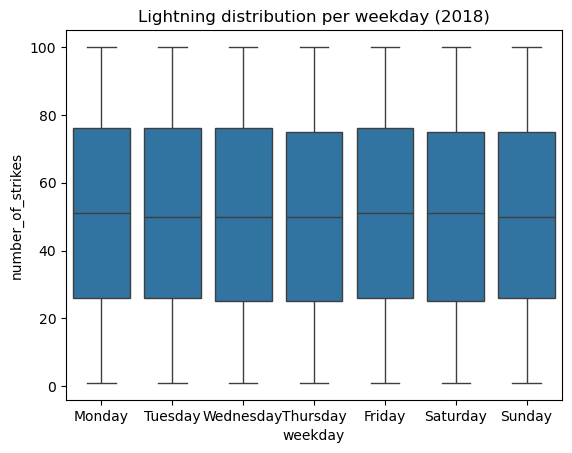

In [27]:
# Create boxplots of strike counts for each day of week.
g = sns.boxplot(data=df, 
            x='weekday',
            y='number_of_strikes', 
            order=weekday_order, 
            showfliers=False 
            )
g.set_title('Lightning distribution per weekday (2018)');

we will examine monthly lightning strike data from 2016–2018. We will calculate the percentage of total lightning strikes for each year that occurred in a given month. We will then plot this data on a bar graph.

In [30]:
df_2 = pd.read_csv('ambiguous_lightning_data.csv')
df_2.head()

,date,number_of_strikes,center_point_geom
0,2019-08-02,96,POINT(-137.29 39.04)
1,2016-08-16,90,POINT(-64.93 37.62)
2,2016-02-21,46,POINT(-128.54 35.15)
3,2020-02-27,61,POINT(-69.34 27.12)
4,2017-07-17,88,POINT(-129.42 54.70)


In [31]:
# Convert `date` column to datetime.
df_2['date'] = pd.to_datetime(df_2['date'])

In [32]:
# Create a new dataframe combining 2016–2017 data with 2018 data.
union_df = pd.concat([df.drop(['weekday','week'],axis=1), df_2], ignore_index=True)
union_df.head()

,date,number_of_strikes,center_point_geom,day
0,2019-08-02,96,POINT(-137.29 39.04),02
1,2016-08-16,90,POINT(-64.93 37.62),16
2,2016-02-21,46,POINT(-128.54 35.15),21
3,2020-02-27,61,POINT(-69.34 27.12),27
4,2017-07-17,88,POINT(-129.42 54.70),17


In [35]:
union_df.shape

(600000, 4)

In [36]:
# Add 3 new columns.
union_df['year'] = union_df.date.dt.year
union_df['month'] = union_df.date.dt.month
union_df['month_txt'] = union_df.date.dt.month_name()
union_df.head()

,date,number_of_strikes,center_point_geom,day,year,month,month_txt
0,2019-08-02,96,POINT(-137.29 39.04),02,2019,8,August
1,2016-08-16,90,POINT(-64.93 37.62),16,2016,8,August
2,2016-02-21,46,POINT(-128.54 35.15),21,2016,2,February
3,2020-02-27,61,POINT(-69.34 27.12),27,2020,2,February
4,2017-07-17,88,POINT(-129.42 54.70),17,2017,7,July


In [37]:
# Calculate total number of strikes per year
union_df[['year','number_of_strikes']].groupby(['year']).sum()

,number_of_strikes
year,
2016,6085038
2017,6029912
2018,6033048
2019,6051574
2020,6082808


In [38]:
# Calculate total lightning strikes for each month of each year.
lightning_by_month = union_df.groupby(['month_txt','year']).agg(
    number_of_strikes = pd.NamedAgg(column='number_of_strikes',aggfunc=sum)
    ).reset_index()

lightning_by_month.head()

C:\Users\abhis\AppData\Local\Temp\ipykernel_25320\4141918718.py:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  lightning_by_month = union_df.groupby(['month_txt','year']).agg(


,month_txt,year,number_of_strikes
0,April,2016,490166
1,April,2017,492924
2,April,2018,494922
3,April,2019,495382
4,April,2020,505018


In [39]:
# Calculate total lightning strikes for each year.
lightning_by_year = union_df.groupby(['year']).agg(
  year_strikes = pd.NamedAgg(column='number_of_strikes',aggfunc=sum)
).reset_index()

lightning_by_year.head()

C:\Users\abhis\AppData\Local\Temp\ipykernel_25320\1371192814.py:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  lightning_by_year = union_df.groupby(['year']).agg(


,year,year_strikes
0,2016,6085038
1,2017,6029912
2,2018,6033048
3,2019,6051574
4,2020,6082808


In [48]:
# Combine `lightning_by_month` and `lightning_by_year` dataframes into single dataframe.
percentage_lightning = lightning_by_month.merge(lightning_by_year,on='year')
percentage_lightning.head(20)

,month_txt,year,number_of_strikes,year_strikes
0,April,2016,490166,6085038
1,April,2017,492924,6029912
2,April,2018,494922,6033048
3,April,2019,495382,6051574
4,April,2020,505018,6082808
5,August,2016,527834,6085038
6,August,2017,504926,6029912
7,August,2018,521942,6033048
8,August,2019,511528,6051574
9,August,2020,519408,6082808


In [49]:
# Create new `percentage_lightning_per_month` column.
percentage_lightning['percentage_lightning_per_month'] = (percentage_lightning.number_of_strikes/
                                                          percentage_lightning.year_strikes * 100.0)
percentage_lightning.head()

,month_txt,year,number_of_strikes,year_strikes,percentage_lightning_per_month
0,April,2016,490166,6085038,8.055266
1,April,2017,492924,6029912,8.174647
2,April,2018,494922,6033048,8.203515
3,April,2019,495382,6051574,8.186003
4,April,2020,505018,6082808,8.302383


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

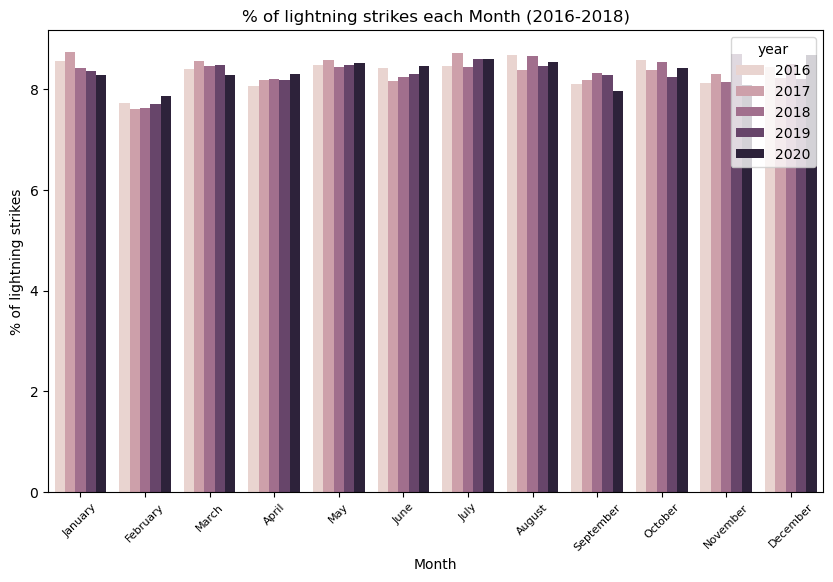

In [51]:
plt.figure(figsize=(10,6));

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

sns.barplot(
    data = percentage_lightning,
    x = 'month_txt',
    y = 'percentage_lightning_per_month',
    hue = 'year',
    order = month_order );
plt.xlabel("Month");
plt.ylabel("% of lightning strikes");
plt.title("% of lightning strikes each Month (2016-2018)");
plt.xticks(rotation = 45, fontsize = 8)